## Build Triton and Neptune
TODO:
* Make a dual plot one for triton with obliquity one with not
* Look into retrograde orbit for triton
* Look into Neptune obliquity
* Look into Triton layer tidal scales make sure they are correct.

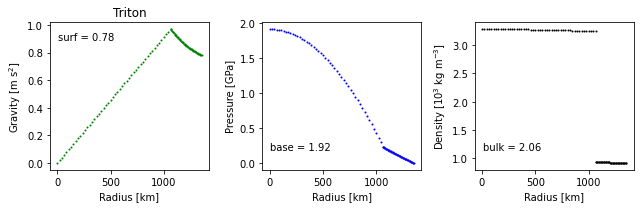

0.9993462429538973


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TidalPy import build_world, Orbit

neptune = build_world('Neptune')
sol = build_world('Sol')
triton = build_world('Triton')
triton_cpl = build_world('Triton_Simple')
triton_ctl = build_world('Triton_Simple')
triton_ctl.config['tides']['use_ctl'] = True
triton_ctl.reinit()

# See how the interior of the rheology-based world was built
triton.paint()
print(triton.mass / 2.1390e22)

## Set the thermal state of the viscoelastic Triton

In [2]:
triton.crust.set_strength(viscosity=1.0e14, shear_modulus=3.3e9)
triton.core.set_strength(viscosity=1.0e24, shear_modulus=50.0e9)

## Add worlds into an orbit

In [3]:
orbit = Orbit(sol, neptune, triton, make_copies='star and host')
orbit_cpl = Orbit(sol, neptune, triton_cpl, make_copies='star and host')
orbit_ctl = Orbit(sol, neptune, triton_ctl, make_copies='star and host')

## Compare the CTL, CPL and Rheology-Based Models

In [14]:
# Set triton to half its modern semi-major axis and with an eccentricity of 0.1 to mimic its early history
spin_period_day = np.linspace(0.5, 3., 8000)
semi_major_axis = (354760.0e3 / 2.) * np.ones_like(spin_period_day)
eccentricity = 0.1

orbit.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, semi_major_axis=semi_major_axis, obliquity=np.radians(-23.))
orbit_cpl.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, semi_major_axis=semi_major_axis, obliquity=np.radians(-23.))
orbit_ctl.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, semi_major_axis=semi_major_axis, obliquity=np.radians(-23.))

In [17]:
# Change the CTL planet's fixed dt to match the orbital period
orbit_ctl.tidal_objects[1].tides.set_fixed_dt(86400. * orbit.tidal_objects[1].orbital_period)
orbit_ctl.tidal_objects[1].tides.set_fixed_q(50.)

orbit.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, semi_major_axis=semi_major_axis, obliquity=np.radians(10.))
orbit_cpl.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, semi_major_axis=semi_major_axis, obliquity=np.radians(10.))
orbit_ctl.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, semi_major_axis=semi_major_axis, obliquity=np.radians(10.))

da_dt = orbit.semi_major_axis_time_derivatives[1]
da_dt_cpl = orbit_cpl.semi_major_axis_time_derivatives[1]
da_dt_ctl = orbit_ctl.semi_major_axis_time_derivatives[1]

m_sec_to_NR_myr = 3.154e13 / neptune.radius
da_dt *= m_sec_to_NR_myr
da_dt_cpl *= m_sec_to_NR_myr
da_dt_ctl *= m_sec_to_NR_myr

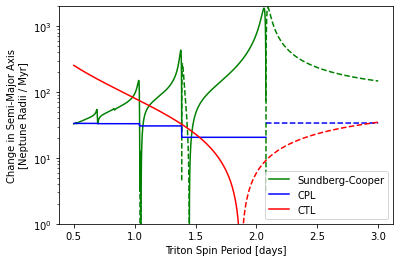

In [18]:
from TidalPy.utilities.numpy_helper import neg_array_for_log_plot
fig, ax = plt.subplots()
da_dt_pos, da_dt_neg = neg_array_for_log_plot(da_dt)
da_dt_cpl_pos, da_dt_cpl_neg = neg_array_for_log_plot(da_dt_cpl)
da_dt_ctl_pos, da_dt_ctl_neg = neg_array_for_log_plot(da_dt_ctl)

ax.plot(spin_period_day, da_dt_pos, '-g', label='Sundberg-Cooper')
ax.plot(spin_period_day, da_dt_neg, '--g')
ax.plot(spin_period_day, da_dt_cpl_pos, '-b', label='CPL')
ax.plot(spin_period_day, da_dt_cpl_neg, '--b')
ax.plot(spin_period_day, da_dt_ctl_pos, '-r', label='CTL')
ax.plot(spin_period_day, da_dt_ctl_neg, '--r')

ax.legend(loc='best')
ax.set(yscale='log', ylabel='Change in Semi-Major Axis\n[Neptune Radii / Myr]', xlabel='Triton Spin Period [days]')
ax.set(ylim=[1e0, 2e3])
plt.show()